In [1]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
df_train = pd.read_csv("data/ADNIMERGE_train.csv")
df_test = pd.read_csv("data/ADNIMERGE_test.csv")

In [3]:
X_train = df_train.drop(['RID', 'DX_bl'], axis=1).copy()
y_train = df_train['DX_bl'].copy()
X_test = df_test.drop(['RID', 'DX_bl'], axis=1).copy()
y_test = df_test['DX_bl'].copy()

In [4]:
# function to help compare the accuracy of models
def score(model, X_train, y_train, X_test, y_test):
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    test_class0 = model.score(X_test[y_test==0], y_test[y_test==0])
    test_class1 = model.score(X_test[y_test==1], y_test[y_test==1])
    test_class2 = model.score(X_test[y_test==2], y_test[y_test==2])
    return pd.Series([train_acc, test_acc, test_class0, test_class1, test_class2],
                    index = ['Train accuracy', 'Test accuracy', 
                             "Test accuracy CN", "Test accuracy CI", "Test accuracy AD"])

## Baseline Model

We used `stratified` strategy to generate predictions as a simple baseline to compare with other classifiers we learned in class.

In [5]:
dc = DummyClassifier(strategy='stratified', random_state=9001)
dc.fit(X_train,y_train)
print('Dummy Classifier Training Score: ', dc.score(X_train,y_train))
print('Dummy Classifier Test Score: ', dc.score(X_test,y_test))
print('Dummy Classifier Confusion Matrix:\n', confusion_matrix(y_test,dc.predict(X_test)))
dc_score = score(dc, X_train, y_train, X_test, y_test)

Dummy Classifier Training Score:  0.423510466989
Dummy Classifier Test Score:  0.444444444444
Dummy Classifier Confusion Matrix:
 [[14 19  9]
 [27 52 14]
 [ 7 14  6]]


## Logistic Regression

We tested 6 kinds of logistic regression, logistic regression with l1 penalty, logistic regression with l2 penalty, unweighted logistic regression, weighted logistic regression, one-vs-rest logistic regression and multinomial logistic regression. We chose the best parameters with cross validation. We found that unless we used weighted logistic regression, we need a large regularization term. However, the accuracy of weighted logistic regression is very low compared to the others. That indicates that we have too many variables.

In [6]:
#l1
log_l1 = LogisticRegressionCV(penalty = 'l1', solver = 'liblinear', random_state=9001)
log_l1.fit(X_train,y_train)

#l2
log_l2 = LogisticRegressionCV(penalty = 'l2', random_state=9001)
log_l2.fit(X_train,y_train)

#Unweighted logistic regression
unweighted_logistic = LogisticRegressionCV(random_state=9001)
unweighted_logistic.fit(X_train,y_train)

#Weighted logistic regression
weighted_logistic = LogisticRegressionCV(class_weight='balanced', random_state=9001)
weighted_logistic.fit(X_train,y_train)

#ovr
log_ovr = LogisticRegressionCV(multi_class = 'ovr', random_state=9001)
log_ovr.fit(X_train,y_train)

#multinomial
log_multinomial = LogisticRegressionCV(multi_class = 'multinomial', solver = 'newton-cg', random_state=9001)
log_multinomial.fit(X_train,y_train)

print("Regularization strength: ")
print("-------------------------")
print("Logistic regression with l1 penalty:", log_l1.C_[0])
print("Logistic regression with l2 penalty:", log_l2.C_[0])
print("Unweighted logistic regression: ", unweighted_logistic.C_[0])
print("Weighted logistic regression: ", weighted_logistic.C_[0])
print("OVR logistic regression: ", log_ovr.C_[0])
print("Multinomial logistic regression: ", log_multinomial.C_[0])

Regularization strength: 
-------------------------
Logistic regression with l1 penalty: 2.78255940221
Logistic regression with l2 penalty: 0.35938136638
Unweighted logistic regression:  0.35938136638
Weighted logistic regression:  166.81005372
OVR logistic regression:  0.35938136638
Multinomial logistic regression:  21.5443469003


In [7]:
#Computing the score on the train set - 
print("Training accuracy")
print("-------------------------------------------------")
print('Logistic Regression with l1 penalty train Score: ',log_l1.score(X_train, y_train))
print('Logistic Regression with l2 penalty train Score: ',log_l2.score(X_train, y_train))
print('Unweighted Logistic Regression with train Score: ',unweighted_logistic.score(X_train, y_train))
print('Weighted Logistic Regression train Score: ',weighted_logistic.score(X_train, y_train))
print('OVR Logistic Regression train Score: ',log_ovr.score(X_train, y_train))
print('Multinomial Logistic Regression train Score: ',log_multinomial.score(X_train, y_train))

print('\n')

#Computing the score on the test set - 
print("Test accuracy")
print("-------------------------------------------------")
print('Logistic Regression with l1 penalty test Score: ',log_l1.score(X_test, y_test))
print('Logistic Regression with l2 penalty test Score: ',log_l2.score(X_test, y_test))
print('Unweighted Logistic Regression test Score: ',unweighted_logistic.score(X_test, y_test))
print('Weighted Logistic Regression test Score: ',weighted_logistic.score(X_test, y_test))
print('OVR Logistic Regression test Score: ',log_ovr.score(X_test, y_test))
print('Multinomial Logistic Regression test Score: ',log_multinomial.score(X_test, y_test))

Training accuracy
-------------------------------------------------
Logistic Regression with l1 penalty train Score:  0.82769726248
Logistic Regression with l2 penalty train Score:  0.615136876006
Unweighted Logistic Regression with train Score:  0.615136876006
Weighted Logistic Regression train Score:  0.478260869565
OVR Logistic Regression train Score:  0.615136876006
Multinomial Logistic Regression train Score:  0.843800322061


Test accuracy
-------------------------------------------------
Logistic Regression with l1 penalty test Score:  0.783950617284
Logistic Regression with l2 penalty test Score:  0.586419753086
Unweighted Logistic Regression test Score:  0.586419753086
Weighted Logistic Regression test Score:  0.388888888889
OVR Logistic Regression test Score:  0.586419753086
Multinomial Logistic Regression test Score:  0.753086419753


In [8]:
# store the accuracy score
l1_score = score(log_l1, X_train, y_train, X_test, y_test)
l2_score = score(log_l2, X_train, y_train, X_test, y_test)
weighted_score = score(weighted_logistic, X_train, y_train, X_test, y_test)
unweighted_score = score(unweighted_logistic, X_train, y_train, X_test, y_test)
ovr_score = score(log_ovr, X_train, y_train, X_test, y_test)
multi_score = score(log_multinomial, X_train, y_train, X_test, y_test)

In [9]:
# confusion matrix
l1_pred = log_l1.predict(X_test)
l2_pred = log_l2.predict(X_test)
weighted_pred = weighted_logistic.predict(X_test)
unweighted_pred = unweighted_logistic.predict(X_test)
ovr_pred = log_ovr.predict(X_test)
multi_pred = log_multinomial.predict(X_test)

print("Confusion Matrix")
print("Logistic Regression with l1 penalty:\n",
      confusion_matrix(y_test, l1_pred))
print("Logistic Regression with l2 penalty:\n",
      confusion_matrix(y_test, l2_pred))
print("Unweighted Logistic Regression:\n",
      confusion_matrix(y_test, unweighted_pred))
print("Weighted Logistic Regression:\n",
      confusion_matrix(y_test, weighted_pred))
print("OVR Logistic Regression:\n",
      confusion_matrix(y_test, ovr_pred))
print("Multinomial Logistic Regression:\n",
      confusion_matrix(y_test, multi_pred))

Confusion Matrix
Logistic Regression with l1 penalty:
 [[24 18  0]
 [10 80  3]
 [ 0  4 23]]
Logistic Regression with l2 penalty:
 [[ 0 42  0]
 [ 0 85  8]
 [ 0 17 10]]
Unweighted Logistic Regression:
 [[ 0 42  0]
 [ 0 85  8]
 [ 0 17 10]]
Weighted Logistic Regression:
 [[32  6  4]
 [52 13 28]
 [ 2  7 18]]
OVR Logistic Regression:
 [[ 0 42  0]
 [ 0 85  8]
 [ 0 17 10]]
Multinomial Logistic Regression:
 [[28 14  0]
 [17 71  5]
 [ 0  4 23]]


## Discriminant Analysis

We performed normalization on continuous predictors and used Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) as our models. LDA performs really well.

In [10]:
# normalization
cols_standardize = [
    c for c in X_train.columns 
    if (not c.startswith('PT')) or (c=='PTEDUCAT')]

X_train_std = X_train.copy()
X_test_std = X_test.copy()
for c in cols_standardize:
    col_mean = np.mean(X_train[c])
    col_sd = np.std(X_train[c])
    if col_sd > (1e-10)*col_mean:
        X_train_std[c] = (X_train[c]-col_mean)/col_sd
        X_test_std[c] = (X_test[c]-col_mean)/col_sd

In [11]:
X_train_std.head()

,PTGENDER,PTEDUCAT,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian/Other_PI,PTRACCAT_More_than_one,PTRACCAT_Unknown,PTRACCAT_White,PTETHCAT_Not_Hisp/Latino,PTMARRY_Married,...,WholeBrain,WholeBrain_slope,Entorhinal,Entorhinal_slope,Fusiform,Fusiform_slope,MidTemp,MidTemp_slope,ICV,ICV_slope
0,0,-2.852257,0,0,0,0,0,1,1,0,...,-1.761500,-0.567555,-0.820814,-1.269796,-1.426968,0.156847,-2.102069,-0.192827,-1.574482,0.093937
1,1,1.376909,0,0,0,0,0,1,1,1,...,-0.134464,-0.028641,-0.070387,0.188014,0.721399,-0.067438,0.019784,0.506511,-0.489132,-0.265646
2,0,0.607970,0,0,0,0,0,1,1,1,...,-1.300396,0.310720,0.456478,-0.560840,0.292776,0.016824,-0.650452,0.224140,-1.239633,-0.014198
3,0,-0.160970,0,0,0,0,0,1,1,0,...,-0.000094,-0.003749,0.006635,-0.003683,0.010325,0.015345,0.018697,0.004091,-0.005136,0.004314
4,1,-0.160970,0,0,0,0,0,1,1,0,...,-0.000094,-0.003749,0.006635,-0.003683,0.010325,0.015345,0.018697,0.004091,1.652198,-0.047345


In [12]:
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

lda.fit(X_train_std,y_train)
qda.fit(X_train_std,y_train)

# training accuracy
print("Training accuracy")
print("------------------")
print('LDA Train Score: ',lda.score(X_train_std,y_train))
print('QDA Train Score: ',qda.score(X_train_std,y_train))

print('\n')

# test accuracy
print("Test accuracy")
print("------------------")
print('LDA Test Score: ',lda.score(X_test_std,y_test))
print('QDA Test Score: ',qda.score(X_test_std,y_test))

Training accuracy
------------------
LDA Train Score:  0.85346215781
QDA Train Score:  0.816425120773


Test accuracy
------------------
LDA Test Score:  0.796296296296
QDA Test Score:  0.716049382716


In [13]:
# store the accuracy score
lda_score = score(lda, X_train_std, y_train, X_test_std, y_test)
qda_score = score(qda, X_train_std, y_train, X_test_std, y_test)

In [14]:
# confusion matrix
lda_pred = lda.predict(X_test_std)
qda_pred = qda.predict(X_test_std)

print("Confusion Matrix")
print("LDA:\n",
      confusion_matrix(y_test, lda_pred))
print("QDA:\n",
      confusion_matrix(y_test, qda_pred))

Confusion Matrix
LDA:
 [[26 16  0]
 [ 9 79  5]
 [ 1  2 24]]
QDA:
 [[29 13  0]
 [12 66 15]
 [ 0  6 21]]


## K-Nearest Neighbours

The optimal number of neighbours is 37, which is a relatively large number considering that we only have 783 observations. The accuracy is not satisfactory as well.

In [15]:
cv_fold = KFold(n_splits=5, shuffle=True, random_state=9001)

max_score = 0
max_k = 0 

for k in range(1,60):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn_val_score = cross_val_score(knn, X_train, y_train, cv=cv_fold).mean()
    if knn_val_score > max_score:
        max_k = k
        max_score = knn_val_score
        
knn = KNeighborsClassifier(n_neighbors = max_k)
knn.fit(X_train,y_train)

print("Optimal number of neighbours: ", max_k)
print('KNN Training Accuracy: ', knn.score(X_train,y_train))
print('KNN Test Accuracy: ', knn.score(X_test,y_test))

# Store the accuracy score
knn_score = score(knn, X_train, y_train, X_test, y_test)

Optimal number of neighbours:  41
KNN Training Accuracy:  0.566827697262
KNN Test Accuracy:  0.574074074074


In [16]:
# confusion matrix
knn_pred = knn.predict(X_test)

print("KNN Confusion Matrix:\n",
      confusion_matrix(y_test, knn_pred))

KNN Confusion Matrix:
 [[ 0 42  0]
 [ 0 92  1]
 [ 1 25  1]]


## Decision Tree

We used 5-fold cross validation to find the optimal depth for the decision tree. The optimal depth is 6.

In [17]:
depth = []
for i in range(3,20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=9001)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=cv_fold, n_jobs=-1)
    depth.append((i, scores.mean(), scores.std())) 
depthvals = [t[0] for t in depth]
cvmeans = np.array([t[1] for t in depth])
cvstds = np.array([t[2] for t in depth])
max_indx = np.argmax(cvmeans)
md_best = depthvals[max_indx]
print('Optimal depth:',md_best)
dt_best = DecisionTreeClassifier(max_depth=md_best, random_state=9001)
dt_best.fit(X_train, y_train).score(X_test, y_test)
dt_score = score(dt_best, X_train, y_train, X_test, y_test)

Optimal depth: 6


In [18]:
print('Decision Tree Training Accuracy: ', dt_best.score(X_train,y_train))
print('Decision Tree Test Accuracy: ', dt_best.score(X_test,y_test))

Decision Tree Training Accuracy:  0.90499194847
Decision Tree Test Accuracy:  0.734567901235


In [19]:
# confusion matrix
dt_pred = dt_best.predict(X_test)

print("Decision Tree Confusion Matrix:\n",
      confusion_matrix(y_test, dt_pred))

Decision Tree Confusion Matrix:
 [[24 18  0]
 [21 71  1]
 [ 0  3 24]]


## Random Forest

We used `GridSearchCV` to find the optimal number of trees and tree depth. We then used the optimal value to perform random forest classification.

In [20]:
trees = [2**x for x in range(8)]  # 1, 2, 4, 8, 16, 32, ...
depth = [2, 4, 6, 8, 10]
parameters = {'n_estimators': trees,
              'max_depth': depth}
rf = RandomForestClassifier(random_state=9001)
rf_cv = GridSearchCV(rf, parameters, cv=cv_fold)
rf_cv.fit(X_train, y_train)
best_score = np.argmax(rf_cv.cv_results_['mean_test_score'])
result = rf_cv.cv_results_['params'][best_score]
opt_depth = result['max_depth']
opt_tree = result['n_estimators']
print("Optimal number of trees {}, tree depth: {}".format(opt_tree, opt_depth))
rf = RandomForestClassifier(n_estimators=opt_tree, max_depth=opt_depth, random_state=9001)
rf.fit(X_train, y_train)
print('\n')
print('Random Forest Training Accuracy: ', rf.score(X_train,y_train))
print('Random Forest Test Accuracy: ', rf.score(X_test,y_test))
rf_score = score(rf, X_train, y_train, X_test, y_test)

Optimal number of trees 16, tree depth: 8


Random Forest Training Accuracy:  0.972624798712
Random Forest Test Accuracy:  0.796296296296


In [21]:
# confusion matrix
rf_pred = rf.predict(X_test)

print("Random Forest Confusion Matrix:\n",
      confusion_matrix(y_test, rf_pred))

Random Forest Confusion Matrix:
 [[20 22  0]
 [ 4 87  2]
 [ 0  5 22]]


## AdaBoost

We used the optimal tree depth found by cross validation in the decision tree classifier, and performed `GridSearchCV` to find the optimal number of trees and learning rate.

In [22]:
trees = [2**x for x in range(6)]  # 1, 2, 4, 8, 16, 32, ...
learning_rate = [0.1, 0.5, 1, 5]
parameters = {'n_estimators': trees,
              'learning_rate': learning_rate}
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=md_best),
                        random_state=9001)
ab_cv = GridSearchCV(ab, parameters, cv=cv_fold)
ab_cv.fit(X_train, y_train)
best_score = np.argmax(ab_cv.cv_results_['mean_test_score'])
result = ab_cv.cv_results_['params'][best_score]
opt_learning_rate = result['learning_rate']
opt_tree = result['n_estimators']
print("Optimal number of trees {}, learning rate: {}".format(opt_tree, opt_learning_rate))
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=md_best), n_estimators=opt_tree,
                       learning_rate=opt_learning_rate, random_state=9001)
ab.fit(X_train, y_train)
print('\n')
print('AdaBoost Training Accuracy: ', ab.score(X_train,y_train))
print('AdaBoost Test Accuracy: ', ab.score(X_test,y_test))
ab_score = score(ab, X_train, y_train, X_test, y_test)

Optimal number of trees 16, learning rate: 1


AdaBoost Training Accuracy:  1.0
AdaBoost Test Accuracy:  0.777777777778


In [23]:
# confusion matrix
ab_pred = ab.predict(X_test)

print("AdaBoost Confusion Matrix:\n",
      confusion_matrix(y_test, ab_pred))

AdaBoost Confusion Matrix:
 [[22 20  0]
 [ 7 80  6]
 [ 0  3 24]]



## Performance Summary

In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')
sns.set_context('paper', font_scale=1.5)

In [25]:
score_df = pd.DataFrame({'Dummy Classifier': dc_score,
                         'Logistic Regression with l1': l1_score, 
                         'Logistic Regression with l2': l2_score,
                         'Weighted logistic': weighted_score,
                         'Unweighted logistic': unweighted_score,
                         'OVR': ovr_score,
                         'Multinomial': multi_score,
                         'KNN': knn_score,
                         'LDA': lda_score,
                         'QDA': qda_score,
                         'Decision Tree': dt_score,
                         'Random Forest': rf_score,
                         'AdaBoost': ab_score})
score_df

,AdaBoost,Decision Tree,Dummy Classifier,KNN,LDA,Logistic Regression with l1,Logistic Regression with l2,Multinomial,OVR,QDA,Random Forest,Unweighted logistic,Weighted logistic
Train accuracy,1.000000,0.904992,0.423510,0.566828,0.853462,0.827697,0.615137,0.843800,0.615137,0.816425,0.972625,0.615137,0.478261
Test accuracy,0.777778,0.734568,0.444444,0.574074,0.796296,0.783951,0.586420,0.753086,0.586420,0.716049,0.796296,0.586420,0.388889
Test accuracy CN,0.523810,0.571429,0.333333,0.000000,0.619048,0.571429,0.000000,0.666667,0.000000,0.690476,0.476190,0.000000,0.761905
Test accuracy CI,0.860215,0.763441,0.516129,0.989247,0.849462,0.860215,0.913978,0.763441,0.913978,0.709677,0.935484,0.913978,0.139785
Test accuracy AD,0.888889,0.888889,0.222222,0.037037,0.888889,0.851852,0.370370,0.851852,0.370370,0.777778,0.814815,0.370370,0.666667


In [26]:
names_sorted = [
    pair[0] for pair in sorted(
        zip(score_df.columns, score_df.loc['Test accuracy']), 
        key=lambda x:x[1], reverse=False) ]
names_ticks = [
    n.replace(' ','\n') for n in names_sorted ]

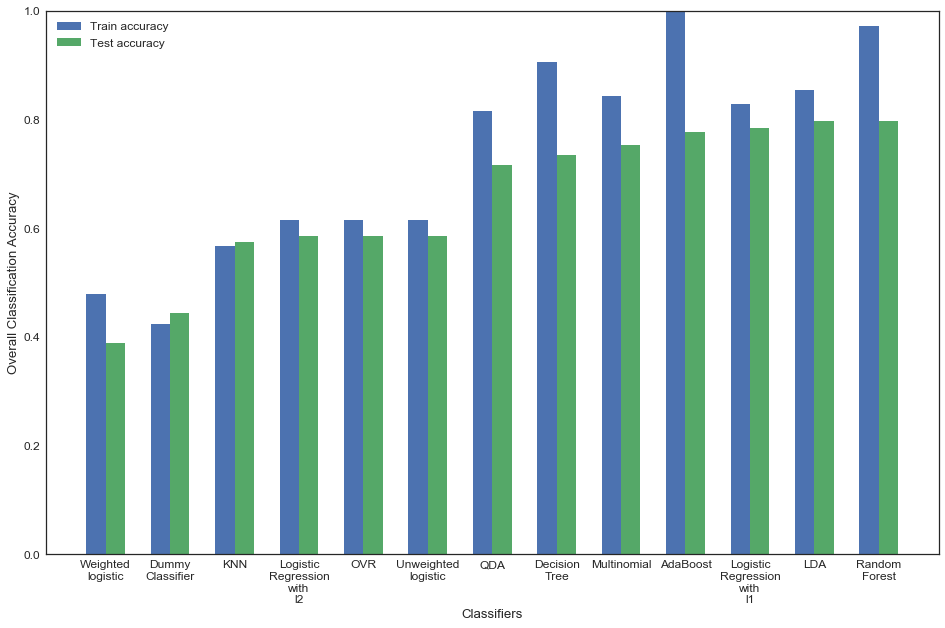

In [27]:
bar_width = 0.3
plt.figure(figsize = (16,10))
for i,idx in enumerate(score_df.index[:2]):
    plt.bar(np.arange(len(names_sorted))+i*bar_width, score_df[names_sorted].loc[idx], 
            bar_width, color=sns.color_palette()[i], label=idx)
plt.xticks(np.arange(len(names_sorted))+0.15, names_ticks)
plt.ylabel('Overall Classification Accuracy')
plt.xlabel('Classifiers')
plt.legend(loc='best')
plt.ylim(0,1)
plt.show()

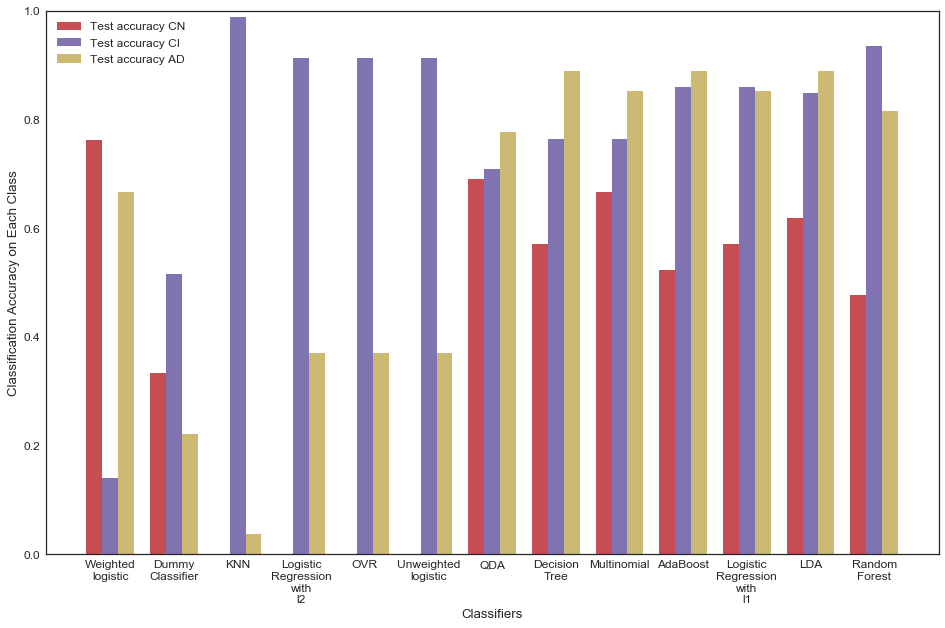

In [28]:
bar_width = 0.3
plt.figure(figsize = (16,10))
for i,idx in enumerate(score_df.index[2:]):
    plt.bar(1.2*np.arange(len(names_sorted))+i*bar_width, score_df[names_sorted].loc[idx], 
            bar_width, color=sns.color_palette()[i+2], label=idx)
plt.xticks(1.2*np.arange(len(names_sorted))+0.3, names_ticks)
plt.ylabel('Classification Accuracy on Each Class')
plt.xlabel('Classifiers')
plt.legend(loc='best')
plt.ylim(0,1)
plt.show()

For baseline models, people usually use the dummy classifier with "stratified" strategy or the "most frequent" strategy. The "stratified" method generates prediction according to the class distribution of the training set. The "most frequent" strategy always predicts the most frequent class. We adopted the `stratified` strategy implemented by `sklearn`'s `DummyClassifer` as the baseline model. As can be seen above, all other classification models we used outperformed the dummy classifier as expected.

Based on the above summary, AdaBoost has a very high training accuracy 100%. Random forest classifier has the second highest training accuracy which is close to 1 (0.972625), and it also has the highest accuracy (0.796296) on the test set. LDA has the same test accuracy (0.796296) as random forest classifier, and logistic regression with l1 regularization is the third highest (0.783951).

For classifying `CN` patients, weighted logistic regression has the highest test accuracy (0.833333), so it performs the best for determining Cognitively Normal patients. However, KNN, logistic regression with l2 regularization, OvR logistic regression and unweighted logistic regression have zero accuracy on classifying `CN` patients. Since all of them have very high accuracy on `CI` but low accuracy on `AD`, we think these four models probably classify almost all the `CN` patients into `CI` (as can been seen in the confusion matrix), leading to zero accuracy on `CN` and high accuracy on `CI`.

KNN has the highest test accuracy (0.989247) on diagnosing `CI` cognitive impairment patients. Logistic regression with l2 regularization, random forest classifier, OvR logistic regression and unweighted logistic regression all reach 0.9 accuracy on diagnosing `CI` patients.

Since we focus on the diagnosis of Alzheimer's disease, we are more concerned about the test accuracy on `AD` patients. AdaBoost, LDA and decision tree classifier have the highest test accuracy(0.888889) on `AD` patients. Logistic regression with l1 regularization, random forest classifier and multinomial logistic regression all achieve test accuracy of over 0.8 on the classification of `AD`.

In addition, we find an interesting pattern in the above barplots of accuracy. There seems to be three types of classifiers. Type I includes `Weighted Logistic` and `Dummy Classifier`. Their overall accuracies are at a relatively low level around 0.40. Type II includes `KNN`, `Logistic Regression with l2`, `OvR` and `Unweighted Logistic`. Their overall accuracies are at a midium level around 0.60, and their partial accuracies on the three classes are very unbalanced. None of them can predict correctly on `CN`. Type III includes `QDA`, `Decision Tree`, `Multinomial`, `AdaBoost`, `Logistic Regression with l1`, `LDA` and `Random Forest`. Their overall accuracies are at a relatively high level over 0.70, and their partial accuracies on the three classes are basically balanced. Among Type III classifiers, though `QDA` has the lowest overall accuracy, its partial accuracies are the most balanced. Every Type III classifier has its own advantage and can be competitive substitution to each other.

To conclude, `Random Forest` and `LDA` performed the best if we are concerned about both overall test accuracy and correctly diagnosing `AD` patients. Other models such as `QDA`, `Decision Tree`, `Multinomial`, `AdaBoost` and `Logistic Regression with l1` are also promising.